In [72]:
import numpy as np
import rebound
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [69]:
def get_jacobi_const(sim):
    ps = sim.particles
    star = ps[0]
    planet = ps[1]
    particle = ps[2]
    rstar = np.array(star.xyz)
    rplanet = np.array(planet.xyz)
    r = np.array(particle.xyz)
    v = np.array(particle.vxyz)
    
    KE = 0.5 * v@v # test particle kinetic energy
    mu1 = sim.G * star.m
    mu2 = sim.G * planet.m
    r1 = r-rstar
    r2 = r-rplanet
    PE = -1*mu1/np.sqrt(r1@r1) - mu2/np.sqrt(r2@r2) # test particle potential energy
    
    lz = np.cross(r,v)[-1]
    
    CJ = 2 * planet.n * lz - 2 * (KE + PE) # jacobi constant
    return CJ

def pericenter_sim():
    sim = rebound.Simulation()
    sun = rebound.Particle(m=1.)
    sim.add(sun)
    sim.add(primary=sun, m=9.55e-4, a=5.2)
    sim.add(primary=sun, m=2.857e-4, a=9.58,e=0.99,inc=math.pi/2.)
    sim.move_to_com()
    return sim

def chaotic_exchange_sim():
    sim = rebound.Simulation()
    # Setup using xyz instead of orbital elements for
    # machine independent test

    star_m = 1;
    jup_m = 0.01 / (star_m - 0.01);

    jup_a = 5.2;
    jup_e = 0.0;
    star_x = -(jup_m / (star_m + jup_m)) * (jup_a * (1 + jup_e));
    star_vy = -(jup_m / (star_m + jup_m)) * np.sqrt(((star_m + jup_m) / jup_a) * ((1 - jup_e) / (1 + jup_e)));

    jup_x = (star_m / (star_m + jup_m)) * (jup_a * (1 + jup_e));
    jup_vy = (star_m / (star_m + jup_m)) * np.sqrt(((star_m + jup_m) / jup_a) * ((1 - jup_e) / (1 + jup_e)));

    t_x = 4.42;
    t_vy = 0.0072 * (365.25) * (1 / (2 * np.pi))

    sim = rebound.Simulation()
    sim.add(m=star_m, x=star_x, vy=star_vy)
    sim.add(m=jup_m, x=jup_x, vy = jup_vy)
    sim.add(m=0, x=t_x + star_x, vy = t_vy + star_vy)
    return sim

In [47]:
star_m = 1;
jup_m = 0.01 / (star_m - 0.01);

jup_a = 5.2;
jup_e = 0.0;
star_x = -(jup_m / (star_m + jup_m)) * (jup_a * (1 + jup_e));
star_vy = -(jup_m / (star_m + jup_m)) * np.sqrt(((star_m + jup_m) / jup_a) * ((1 - jup_e) / (1 + jup_e)));

jup_x = (star_m / (star_m + jup_m)) * (jup_a * (1 + jup_e));
jup_vy = (star_m / (star_m + jup_m)) * np.sqrt(((star_m + jup_m) / jup_a) * ((1 - jup_e) / (1 + jup_e)));

t_x = 4.42;
t_vy = 0.0072 * (365.25) * (1 / (2 * np.pi))

sim = rebound.Simulation()
sim.add(m=star_m, x=star_x, vy=star_vy)
sim.add(m=jup_m, x=jup_x, vy = jup_vy)
sim.add(m=0, x=t_x + star_x, vy = t_vy + star_vy)
sim.move_to_com()

E0 = get_jacobi_const(sim)

In [48]:
sim.integrator='trace'
sim.integrate(5000. * 2 * np.pi)
sim.dt = (8./365.) * 2 * np.pi

In [46]:
(get_jacobi_const(sim) - E0) / E0

1.4676149465760377e-10

In [52]:
sim = rebound.Simulation()
sun = rebound.Particle(m=1.)
sim.add(primary=sun, m=9.55e-4, a=5.2)
sim.add(primary=sun, m=2.857e-4, a=9.58,e=0.99,inc=math.pi/2.)
sim.move_to_com()
sim.integrator='trace'
sim.dt = 0.15 * 2 * math.pi
E0 = sim.energy()

In [53]:
sim.integrate(3000.)
(sim.energy() - E0) / E0

4.524339047234746e-08

In [70]:
sim = pericenter_sim()
sim.integrator = "ias15"
start_ias15=datetime.now()
sim.integrate(3000.)
time_ias15 = (datetime.now()-start_ias15).total_seconds()

sim = pericenter_sim()
sim.integrator = "trace"
sim.dt = 0.15 * 2 * math.pi
E0 = sim.energy()
start_trace=datetime.now()
sim.integrate(3000.)
time_trace = (datetime.now()-start_trace).total_seconds()
dE_trace = abs((sim.energy() - E0)/E0)

dE_trace,time_trace,time_ias15

(0.00027443986142116657, 0.003205, 0.053479)

In [67]:
sim = pericenter_sim()
sim.integrator = "trace"
sim.dt = 0.15 * 2 * math.pi
E0 = sim.energy()
start_trace=datetime.now()
sim.integrate(3000.)
time_trace = (datetime.now()-start_trace).total_seconds()
dE_trace = abs((sim.energy() - E0)/E0)

In [68]:
sim.particles[2].a

AttributeError: Index 2 used to access particles out of range.

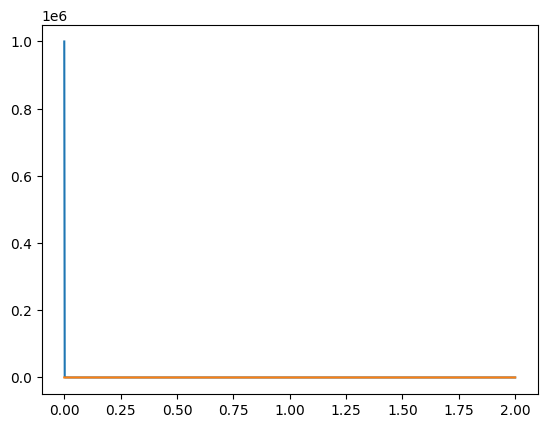

In [76]:
semis = np.linspace(0.000001, 2, 1000)
plt.plot(semis, semis**-1)
plt.plot(semis, np.log10(semis))